<a href="https://colab.research.google.com/github/giangkhuat/2D-MNIST-Digit-Classification/blob/master/Giang_Khuat_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4 (HW4)

Deadline: November 20th. Midnight

Hand in: the homework must be handed in through the Moodle system. 

Provide a written answer if requested in the exercise!


---

## Exercise 1 (HW 4/1)

In this exercise we will deal with polynomial regression. The goal will be to analize how the degree of the polynomial affects its performance. (60%)

**a)**  Create (simulate) data from some known probability distribution, i.e. create "artificial" two dimensional data! **Simulate at least 1000 datapoints**.
* Use the data-generating function provided below on a reasonably chosen interval - feel free to modify the function to get data that suits your taste :)
* Visualize the data on a scatterplot!


(*Hint*: To check that you are proceeding correctly make sure that your scatterplot does look like a polynomial with added noise.)

In [0]:
import numpy as np

def curve_generator(x, sigma):
    y = np.random.normal(10-10*x+x**2, sigma)
    return y

In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
x_array = np.array([])
y_array = np.array([])
for x in range(1000):
    x_array = np.append(x_array, x)
    y_array = np.append(y_array, curve_generator(x, 0.1))

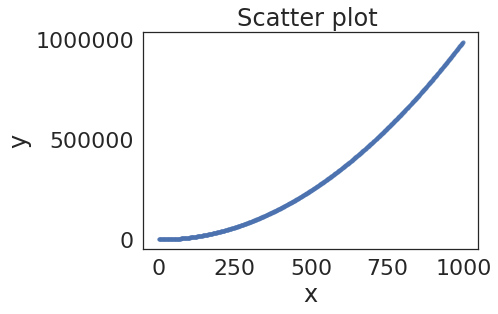

In [0]:
area = np.pi*3
plt.scatter(x_array, y_array, s=area, alpha=0.5)
plt.title('Scatter plot ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.33, random_state=42)

* Randomly select 2/3 of your data as your training set and the remaining as your test set! (Hint: use the *train_test_split* function!)
* Represent the training and test set data in the same figure with different colors. 

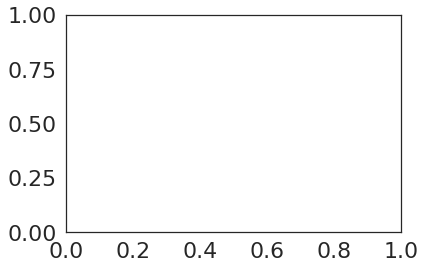

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot()

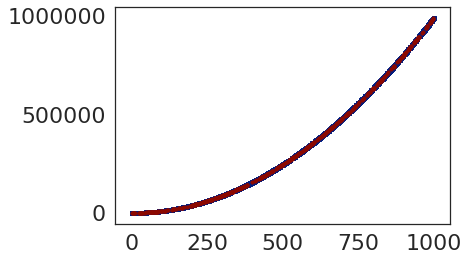

In [0]:
ax1.scatter(X_train, y_train, s=10, c='b', marker="s", label='train')
ax1.scatter(X_test,y_test, s=10, c='r', marker="o", label='test')
# plt.legend(loc='upper left');
plt.show()
fig

**b)** Apply a simple polynomial regression to the data (target variable: $y$, explanatory variable: $x$). (Hint: use the *np.polyfit* function!) 
* Represent the training and test set error (RMSE-value) with different colors in the same figure, as a function of the degree of the polynomial regression (analyze values of the polynomial degree between 0 and 20)!
* What can you observe? <span style="color:red">(Provide a written answer!)</span>

In [0]:
np.polyfit(X_train, y_train, 2)

array([ 1.00000001, -9.99999213,  9.98624444])

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rms(y_actual, y_predicted):
  return sqrt(mean_squared_error(y_actual, y_predicted))

In [0]:
#  generate degrees list 1 ... 20
degree_list = []
rmse = 0

# RMSE array
rmse_list_train = []
rmse_list_test = []

trainSet_len = len(X_train)
testSet_len = len(X_test)
y_train_predicted = []
y_test_predicted = []

# Generate degree list
for i in np.arange(1, 20):
  degree_list.append(i)

def loop_through_data(x_data, y_data, coeff_array):
  y_predicted_arr = []
  dataset_size = len(x_data)
  for i in range(dataset_size):
    x_tmp = x_data[i]
    y_tmp = y_data[i]
    predicted_y = 0
    k = 0
    # k = 0 -> highest degree, k = 1, degree - 1
    deg = len(coeff_array) -1 
    while deg >= 0:
      predicted_y +=coeff_array[k]*np.power(x_tmp, deg)
      deg -= 1
      k +=1
    y_predicted_arr.append(predicted_y)  
  return y_predicted_arr  
    
degree_list = np.arange(1, 20)

def data_rmse( x_data, y_data, deg_lst):
  predicted_y_arr = []
  rmse_list = []
  for i in degree_list:
    rmse = 0
    coeff_array = np.polyfit(x_data, y_data, i)
    predicted_y_arr = loop_through_data(x_data, y_data, coeff_array)
    rmse = rms(y_data, predicted_y_arr)
    rmse_list.append(rmse)
  return rmse_list

rmse_list_train = data_rmse( X_train, y_train, degree_list)
rmse_list_test = data_rmse(X_test, y_test, degree_list)

print(rmse_list_train)
print(rmse_list_test)

# For each degree, generate a polynomial fit with x _train and y_train 
# coef_arr = np.polyfit(X_train, y_train, deg)
# for each coef in coef_arr: 
# Use this whole coeff arr to get a predicted y
# calculate rmse value from predicted y
# put it in the array of errors

# Repeat same process for x_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: RankWarning: Polyfit may be poorly conditioned


[73804.67089665456, 0.09805190921427284, 0.09796948273306763, 0.09793031234301748, 0.09789851477542297, 0.0977309011422384, 0.09772996020019485, 0.09749857916734773, 0.09742509062921532, 0.0973313159680109, 0.0973307852438291, 0.09695922930637364, 0.09695556910518961, 0.09687898976237498, 0.09687117719014336, 0.09671965210223901, 0.09661931426765612, 0.09660368093203543, 0.09660228006877945]
[75920.6001697445, 0.09770541337018822, 0.09762735132952269, 0.09674632801414494, 0.09672156914363063, 0.09638845733060872, 0.09638789340342682, 0.0963695769300764, 0.09603371397755935, 0.09600251601740879, 0.09591499444821952, 0.09591397888406335, 0.09583129069054638, 0.09537883050003412, 0.09536092846940486, 0.09531020151981578, 0.09529113747546968, 0.0952837054879459, 0.09527137754595602]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: RankWarning: Polyfit may be poorly conditioned


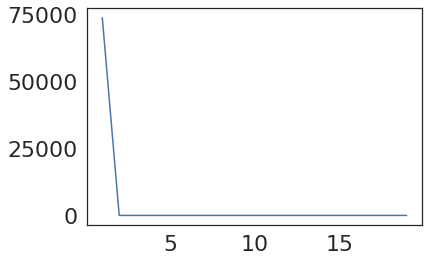

In [0]:
plt.plot(degree_list, rmse_list_train)

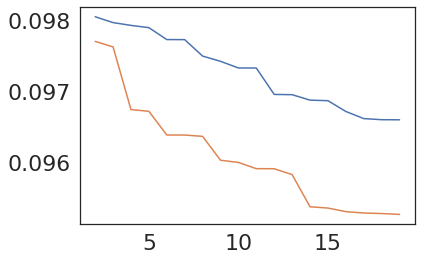

In [0]:
plt.plot(degree_list[1:], rmse_list_train[1:])
plt.plot(degree_list[1:], rmse_list_test[1:])

**c)** How does the modification of the size of the training set affect the performance of the model? 
* Carry out the following analysis for each of these polynomial degree values: 1,2,5 and 10. 
* Fix the degree of the polynomial regression and vary the size of the training set (by reducing the size of the original training set). 
    * Plot the training and test set errors (RMSE values) as a function of the size of the training set in the same figure. 
    * In this same figure, plot the irreducible error produced by the random generation function of the target variable. This will be the value of *sigma*, the standard deviation (which is a constant). 
    * What can you observe? Interpret the plots! <span style="color:red">(Provide a written answer!)</span>

In [0]:
# Degree 1, size of training set = 0.5
X_train_tmp, X_test_tmp, y_train_tmp, y_test_tmp = train_test_split(x_array, y_array, test_size=0.5, random_state=42)

In [0]:

new_deg_lst = [1, 2, 5, 10]
test_data_portion_lst = [0.3, 0.4, 0.5, 0.6, 0.65]


# for each degree
#   1 plot
#    For each of the test_size_portion
#       Create a new dataset by splitting
#       Create a coefficient array by fitting training data with that degree
#       new_predicted y = loop_through_data()
#       Calculate a new rmse
#       Put this in rmse_lst  

sigma = 0.1

def compute_rmse_lsts(deg, x_data, y_data, test_portion_lst):
  predicted_y_train = []
  predicted_y_test = []
  rmse_list_train = []
  rmse_list_test = []
  train_size_lst = []
  sigma_lst  = []
  for portion in test_portion_lst:
    rmse = 0
    X_train_tmp, X_test_tmp, y_train_tmp, y_test_tmp = train_test_split(x_data, y_data, test_size=portion, random_state=42)
    coeff_array = np.polyfit(X_train_tmp, y_train_tmp, deg)
    predicted_y_train = loop_through_data(X_train_tmp, y_train_tmp, coeff_array)
    predicted_y_test = loop_through_data(X_test_tmp, y_test_tmp, coeff_array)
    rmse = rms(y_train_tmp, predicted_y_train)
    rmse_list_train.append(rmse)
    rmse = rms(y_test_tmp, predicted_y_test)
    rmse_list_test.append(rmse)
    train_size_lst.append(len(X_train_tmp))
    sigma_lst.append(sigma)
  return rmse_list_train, rmse_list_test, train_size_lst, sigma_lst

def plot_size_rmse(deg, x_data, y_data, test_portion):
  rmse_train= []
  rmse_test = []
  sigma_lst = []
  rmse_train, rmse_test, train_lst, sigma_lst = compute_rmse_lsts(deg, x_data, y_data, test_portion)
  plt.plot(train_lst, rmse_train)
  plt.xlabel("Train Set Size")
  plt.plot(train_lst, rmse_test)
  plt.ylabel("RMSE Error and Sigma")
  plt.plot(train_lst, sigma_lst)
    



In [0]:
x_array_trial = np.array([])
y_array_trial = np.array([])
for x in range(100):
    x_array_trial = np.append(x_array_trial, x)
    y_array_trial = np.append(y_array_trial, curve_generator(x, 0.1))

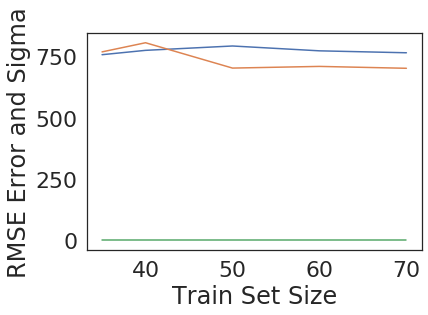

In [0]:
plot_size_rmse(1, x_array_trial, y_array_trial, test_data_portion_lst)

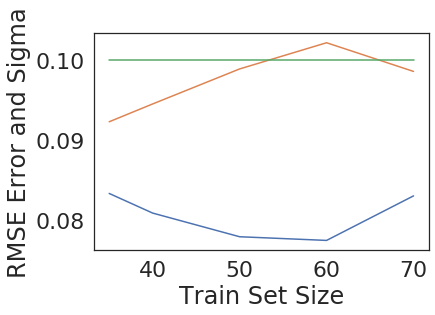

In [0]:
plot_size_rmse(2, x_array_trial, y_array_trial, test_data_portion_lst)

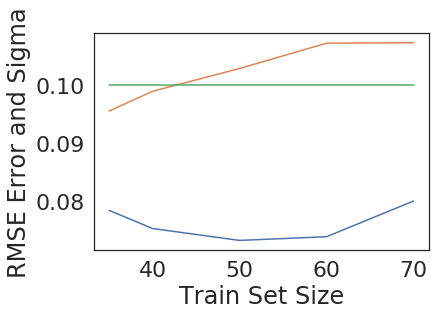

In [0]:
plot_size_rmse(5, x_array_trial, y_array_trial, test_data_portion_lst)

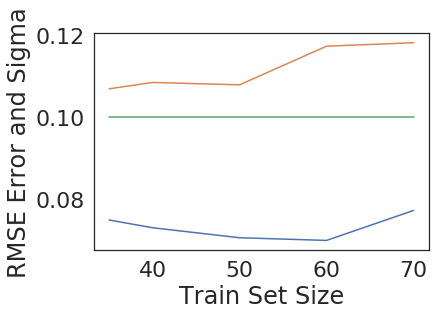

In [0]:
plot_size_rmse(10, x_array_trial, y_array_trial, test_data_portion_lst)

Sampling point from a certain distribution 

If yo have less poitns, chances that you get points to fit a perfect curve are lower

---

## Exercise 2 (HW4/2)

In this exercise you will have to solve a character recognition problem by training a neural network with Keras. (30%)

**a)** Based on the notebook presented in class, train a neural network suitable for character recognition on the MNIST data set! Modify a few parameters of the neural network (activation function, dropout rate, number of nodes in a layer, optimizer etc.) and investigate how the performance of the model varies! (Hint: Install Keras with TensorFlow backend through the Anaconda Navigator Environments tab.) 

In [0]:
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from PIL import ImageOps
import numpy as np
from matplotlib.pyplot import imshow
sns.set(font="Droid Sans",font_scale = 2)
sns.set_style("white")
sns.set_color_codes("dark")

In [0]:
from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
from keras.utils import np_utils
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
# Modelling
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [0]:
model1 = Sequential()
model1.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu',data_format="channels_first"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(15, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(50, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
original_accuracy = []
train_percent = 0.05
iter = 20
for i in range(iter):
    model1.fit(X_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)], y_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)],batch_size=100, epochs=1,verbose=0, validation_split=0.1)
    # calculate the accuracy 
    score = model1.evaluate(X_test, y_test, verbose=0)
    original_accuracy.append(score[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
# Second model, activation function sigmoid
model2 = Sequential()
model2.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='sigmoid',data_format="channels_first"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(15, (3, 3), activation='sigmoid'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='sigmoid'))
model2.add(Dense(50, activation='sigmoid'))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
second_accuracy = []
for i in range(iter):
    model2.fit(X_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)], y_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)],batch_size=100, epochs=1,verbose=0, validation_split=0.1)
    # calculate the accuracy 
    score = model2.evaluate(X_test, y_test, verbose=0)
    second_accuracy.append(score[1])

In [0]:
X = np.arange(iter)
plt.figure(figsize=(15,8))
plt.plot(X*int(train_percent*60000),accuracy,"o-",label="SGD")
plt.plot(X*int(train_percent*60000),second_accuracy,"o-",label="SGD_2")
plt.legend(loc=4)
plt.grid()
plt.xlabel("number of processed training instances")
plt.ylabel("accuray")

NameError: ignored

<Figure size 1080x576 with 0 Axes>

My second model is not as good as the original model.

**b)** Analyze the model performance on the test set, then use the model to try to recognize your own hand-written characters! 
To do this, scan or take a picture some of your hand-written characters, and apply the model to them. You can find hints on how to do this in the notebook used in class! What can you observe: Does the model recognize your handwriting? <span style="color:red">(Provide a written answer!)</span>

In [0]:
# Get sample data from dataset
sample_X_test = X_test[30:130]
sample_Y_test = y_test[30:130]

In [0]:
test_accuracy = []
for i in range(iter):
    model1.fit(X_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)], y_train[i*int(60000*train_percent):(i+1)*int(60000*train_percent)],batch_size=100, epochs=1,verbose=0, validation_split=0.1)
    # calculate the accuracy 
    score = model1.evaluate(sample_X_test, sample_Y_test, verbose=0)
    test_accuracy.append(score[1])

Text(0, 0.5, 'test accuray')

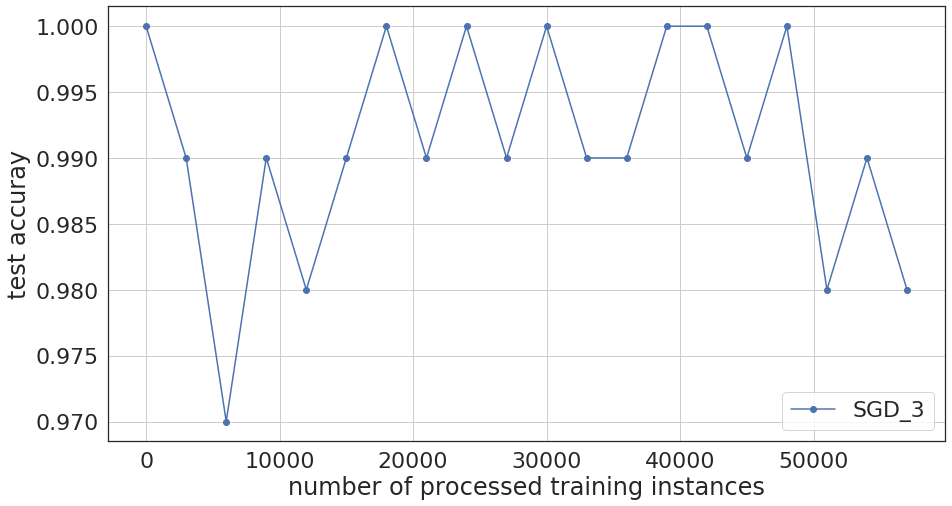

In [0]:
X = np.arange(iter)
plt.figure(figsize=(15,8))
plt.plot(X*int(train_percent*60000),test_accuracy,"o-",label="SGD_3")
plt.legend(loc=4)
plt.grid()
plt.xlabel("number of processed training instances")
plt.ylabel("test accuray")

In [0]:


plt.figure( figsize = ( 40 , 12 ) )
for i in range( 10 ):
    image = Image.open( "0.png" )
    width, height = image.size
    image = image.crop( thresholds[ i ] )
    image = ImageOps.invert( image )
    image.thumbnail( ( 28 , 28 ) )
    image_data = np.asarray( image , dtype = np.uint8 )
    image_data = image_data.sum( 2 ).astype( float )
    image_data /= image_data.max()
    image_data = image_data.reshape( 1 , 1 , 28 , 28 )
    predictions = model.predict( image_data > 0.8 )
    plt.subplot( 2 , 5 , i + 1 )
    plt.bar( range( 10 ) , predictions[ 0 ] , 0.3 , color = "b" , alpha = 0.6 )
    plt.title( i )
    plt.grid()
    plt.xticks( range( 10 ) )

FileNotFoundError: ignored

<Figure size 2880x864 with 0 Axes>